
# Regression Learning

- Data preprocessing
- Regression Algorithms
- Feature Selection
- Hyperparametetr optimization

The dataset is about Air Pollution in Skopje - Center - Macedonia

The goal is to predict the PM10 concentration using the weather-meteorological data

The features are explained in Data_Info (some of them are removed)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
np.random.seed(seed=1)
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

## 1. Load the Data

In [2]:
data = pd.read_excel('Centar_PM10-group3.xlsx')  
# visualize the data
data

,time,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,...,no precip,rain,sleet,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy
0,2015-01-01 00:00:00,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2015-01-01 01:00:00,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2015-01-01 02:00:00,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2015-01-01 03:00:00,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-01 04:00:00,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2015-12-31 19:00:00,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8756,2015-12-31 20:00:00,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8757,2015-12-31 21:00:00,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8758,2015-12-31 22:00:00,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# data statistics
data.describe()

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,no precip,rain,sleet,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy
count,7352.000000,8759.000000,8760.000000,8759.000000,8759.000000,8737.000000,8737.000000,8618.000000,8759.000000,8759.000000,...,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000
mean,72.802447,55.270738,0.434668,43.053717,0.665269,0.000174,0.004478,1018.756200,55.927233,5.743029,...,0.978881,0.020776,0.0,0.000342,0.309703,0.0,0.042009,0.200114,0.176712,0.270434
std,82.213323,19.135721,0.387681,12.707508,0.204420,0.001894,0.032476,8.263537,18.350654,1.312911,...,0.143788,0.142643,0.0,0.018504,0.462398,0.0,0.200621,0.400108,0.381447,0.444209
min,0.270000,0.430000,0.000000,-2.210000,0.130000,0.000000,0.000000,986.110000,4.830000,0.031000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,27.627500,39.400000,0.000000,33.580000,0.520000,0.000000,0.000000,1013.137500,40.800000,6.216000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,42.680000,55.780000,0.440000,44.390000,0.700000,0.000000,0.000000,1017.860000,55.780000,6.216000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,77.680000,69.180000,0.750000,54.050000,0.830000,0.000000,0.000000,1023.550833,69.180000,6.216000,...,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,815.170000,104.870000,1.000000,69.810000,1.000000,0.097200,0.240000,1041.920000,103.810000,6.216000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [4]:
# get the target variable... create X and y
y = pd.DataFrame(data.iloc[:,1])
X = data.drop(['PM10'], axis=1)

In [5]:
X

,time,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,no precip,rain,sleet,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy
0,2015-01-01 00:00:00,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,6.216,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2015-01-01 01:00:00,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,6.216,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2015-01-01 02:00:00,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,6.216,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2015-01-01 03:00:00,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,6.216,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-01 04:00:00,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,6.216,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2015-12-31 19:00:00,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,6.216,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8756,2015-12-31 20:00:00,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,6.216,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8757,2015-12-31 21:00:00,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,6.216,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8758,2015-12-31 22:00:00,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,6.216,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y

,PM10
0,30.020000
1,30.210000
2,29.400000
3,28.830000
4,27.690000
...,...
8755,51.040000
8756,59.000000
8757,72.295000
8758,85.590000


# 2. Data Preprocessing

## 2.1 NULL values

Remove rows where the PM10 variable is missing or NULL

- use: data.dropna(axis=0, inplace=True, subset=['PM10'])

In [7]:
data.isna().sum()

time                      0
PM10                   1408
apparentTemperature       1
cloudCover                0
dewPoint                  1
humidity                  1
precipIntensity          23
precipProbability        23
pressure                142
temperature               1
visibility                1
windBearing            2102
windSpeed                 1
no precip                 0
rain                      0
sleet                     0
snow                      0
Clear                     0
Drizzle                   0
Foggy                     0
Mostly Cloudy             0
Overcast                  0
Partly Cloudy             0
dtype: int64

We remove the NaN instances for the target variable (PM10) of 1408 rows.

In [8]:
# finding all non-numeric rows in order to know what we are going to remove
print(data[pd.to_numeric(data['PM10'], errors='coerce').isnull()][['PM10']])

      PM10
541    NaN
542    NaN
543    NaN
614    NaN
731    NaN
...    ...
8688   NaN
8689   NaN
8731   NaN
8747   NaN
8748   NaN

[1408 rows x 1 columns]


In [9]:
# copy the data into a new dataset, where I will do all the changes
df = data.copy()

In [10]:
df.dropna(axis=0, inplace = True, subset=['PM10'])

In [11]:
df.reset_index(drop = True, inplace = True) #if we go with the default parameters, then we get an extra column with the old indexes.

In [12]:
df

,time,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,...,no precip,rain,sleet,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy
0,2015-01-01 00:00:00,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2015-01-01 01:00:00,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2015-01-01 02:00:00,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2015-01-01 03:00:00,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-01 04:00:00,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,2015-12-31 19:00:00,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7348,2015-12-31 20:00:00,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7349,2015-12-31 21:00:00,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7350,2015-12-31 22:00:00,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 7352 non-null   datetime64[ns]
 1   PM10                 7352 non-null   float64       
 2   apparentTemperature  7351 non-null   float64       
 3   cloudCover           7352 non-null   float64       
 4   dewPoint             7351 non-null   float64       
 5   humidity             7351 non-null   float64       
 6   precipIntensity      7332 non-null   float64       
 7   precipProbability    7332 non-null   float64       
 8   pressure             7232 non-null   float64       
 9   temperature          7351 non-null   float64       
 10  visibility           7351 non-null   float64       
 11  windBearing          5531 non-null   float64       
 12  windSpeed            7351 non-null   float64       
 13  no precip            7352 non-nul

use functions do detect how many values are NULL
 - e.g. data.isnull().sum()

In [14]:
df.dtypes #good to see to know if the date is not defined as datetime type.

time                   datetime64[ns]
PM10                          float64
apparentTemperature           float64
cloudCover                    float64
dewPoint                      float64
humidity                      float64
precipIntensity               float64
precipProbability             float64
pressure                      float64
temperature                   float64
visibility                    float64
windBearing                   float64
windSpeed                     float64
no precip                     float64
rain                          float64
sleet                         float64
snow                          float64
Clear                         float64
Drizzle                       float64
Foggy                         float64
Mostly Cloudy                 float64
Overcast                      float64
Partly Cloudy                 float64
dtype: object

In [15]:
#df['time'] = pd.to_datetime(df['time']) #=> in case it was not defined as datetime type, this is the formula to convert it.

Fill the feature values that are missing or NULL.
 - e.g., data['pressure'] = data['pressure'].fillna(data['pressure'].mean())

In [16]:
#the new situation after removing NaN rows of target variable
df.isna().sum()

time                      0
PM10                      0
apparentTemperature       1
cloudCover                0
dewPoint                  1
humidity                  1
precipIntensity          20
precipProbability        20
pressure                120
temperature               1
visibility                1
windBearing            1821
windSpeed                 1
no precip                 0
rain                      0
sleet                     0
snow                      0
Clear                     0
Drizzle                   0
Foggy                     0
Mostly Cloudy             0
Overcast                  0
Partly Cloudy             0
dtype: int64

In [17]:
df['apparentTemperature'].isnull().any()

True

In [18]:
print(df[pd.to_numeric(df['apparentTemperature'], errors='coerce').isnull()][['apparentTemperature']])

      apparentTemperature
3837                  NaN


In [19]:
#check in general if there are in the whole dataset columns with missing values
df.isna().any()

time                   False
PM10                   False
apparentTemperature     True
cloudCover             False
dewPoint                True
humidity                True
precipIntensity         True
precipProbability       True
pressure                True
temperature             True
visibility              True
windBearing             True
windSpeed               True
no precip              False
rain                   False
sleet                  False
snow                   False
Clear                  False
Drizzle                False
Foggy                  False
Mostly Cloudy          False
Overcast               False
Partly Cloudy          False
dtype: bool

In [20]:
#put all columns which contain nulls in one variable
cols_with_null = [col for col in df.columns if df[col].isnull().any()]

In [21]:
cols_with_null

['apparentTemperature',
 'dewPoint',
 'humidity',
 'precipIntensity',
 'precipProbability',
 'pressure',
 'temperature',
 'visibility',
 'windBearing',
 'windSpeed']

In [22]:
def fill_na(col):
    df[col] = df[col].fillna(df[col].mean())

In [23]:
for col in cols_with_null:
    fill_na(col)

In [24]:
df.isna().sum()

time                   0
PM10                   0
apparentTemperature    0
cloudCover             0
dewPoint               0
humidity               0
precipIntensity        0
precipProbability      0
pressure               0
temperature            0
visibility             0
windBearing            0
windSpeed              0
no precip              0
rain                   0
sleet                  0
snow                   0
Clear                  0
Drizzle                0
Foggy                  0
Mostly Cloudy          0
Overcast               0
Partly Cloudy          0
dtype: int64

### Timestamp... 
- do you need it as feature? 
- can you extract some features from the timestamp? - If yes, extract several (hour, day, month)

* data['hour'] = pd.to_datetime(data['time']).dt.hour

Drop the time feature... it is not needed anymore

In [25]:
#adding new columns from column 'time'
df['hour'] = pd.to_datetime(data['time']).dt.hour
df['day'] = pd.to_datetime(data['time']).dt.day
df['month'] = pd.to_datetime(data['time']).dt.month
df

,time,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,2015-01-01 00:00:00,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1
1,2015-01-01 01:00:00,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1
2,2015-01-01 02:00:00,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,1
3,2015-01-01 03:00:00,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,1
4,2015-01-01 04:00:00,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,2015-12-31 19:00:00,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,3,11
7348,2015-12-31 20:00:00,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,3,11
7349,2015-12-31 21:00:00,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3,11
7350,2015-12-31 22:00:00,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,3,11


In [26]:
# adding sin and cos in order to define the consecutive repeating time series for hour (after 24 comes 1)
df['hour_sin'] = np.sin(df.hour*(2*np.pi/24))
df['hour_cos'] = np.cos(df.hour*(2*np.pi/24))

In [27]:
df

,time,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,...,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month,hour_sin,hour_cos
0,2015-01-01 00:00:00,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,...,0.0,0.0,0.0,0.0,1.0,0,1,1,0.000000,1.000000e+00
1,2015-01-01 01:00:00,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,...,0.0,0.0,0.0,0.0,1.0,1,1,1,0.258819,9.659258e-01
2,2015-01-01 02:00:00,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,...,0.0,0.0,0.0,0.0,1.0,2,1,1,0.500000,8.660254e-01
3,2015-01-01 03:00:00,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,...,0.0,0.0,0.0,0.0,1.0,3,1,1,0.707107,7.071068e-01
4,2015-01-01 04:00:00,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,...,0.0,0.0,0.0,0.0,1.0,4,1,1,0.866025,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,2015-12-31 19:00:00,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,...,0.0,0.0,0.0,0.0,0.0,3,3,11,0.707107,7.071068e-01
7348,2015-12-31 20:00:00,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,...,0.0,0.0,0.0,0.0,0.0,4,3,11,0.866025,5.000000e-01
7349,2015-12-31 21:00:00,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,...,0.0,0.0,0.0,0.0,0.0,5,3,11,0.965926,2.588190e-01
7350,2015-12-31 22:00:00,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,...,0.0,0.0,0.0,0.0,0.0,6,3,11,1.000000,6.123234e-17


In [28]:
df.drop('time', axis = 1, inplace = True)

In [29]:
df

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month,hour_sin,hour_cos
0,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,6.216,...,0.0,0.0,0.0,0.0,1.0,0,1,1,0.000000,1.000000e+00
1,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,6.216,...,0.0,0.0,0.0,0.0,1.0,1,1,1,0.258819,9.659258e-01
2,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,6.216,...,0.0,0.0,0.0,0.0,1.0,2,1,1,0.500000,8.660254e-01
3,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,6.216,...,0.0,0.0,0.0,0.0,1.0,3,1,1,0.707107,7.071068e-01
4,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,6.216,...,0.0,0.0,0.0,0.0,1.0,4,1,1,0.866025,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,6.216,...,0.0,0.0,0.0,0.0,0.0,3,3,11,0.707107,7.071068e-01
7348,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,6.216,...,0.0,0.0,0.0,0.0,0.0,4,3,11,0.866025,5.000000e-01
7349,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,6.216,...,0.0,0.0,0.0,0.0,0.0,5,3,11,0.965926,2.588190e-01
7350,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,6.216,...,0.0,0.0,0.0,0.0,0.0,6,3,11,1.000000,6.123234e-17


In [30]:
#check if there are columns with all null values
cols_with_all_nulls = [col for col in df.columns if (df[col]==0).all()]
cols_with_all_nulls

['sleet', 'Drizzle']

In [31]:
#remove all nulls columns, they do not bring any info
df.drop('sleet', axis = 1, inplace = True)
df.drop('Drizzle', axis = 1, inplace = True)

In [32]:
df.columns

Index(['PM10', 'apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'precipIntensity', 'precipProbability', 'pressure', 'temperature',
       'visibility', 'windBearing', 'windSpeed', 'no precip', 'rain', 'snow',
       'Clear', 'Foggy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'hour',
       'day', 'month', 'hour_sin', 'hour_cos'],
      dtype='object')

## 2.2 Standardize the train and test features. Use StandardScaler
<br><b> do not standardize the target variable!

In [33]:
X = df.drop('PM10', axis=1)
X

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,...,Clear,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month,hour_sin,hour_cos
0,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,6.216,290.000000,...,0.0,0.0,0.0,0.0,1.0,0,1,1,0.000000,1.000000e+00
1,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,6.216,311.000000,...,0.0,0.0,0.0,0.0,1.0,1,1,1,0.258819,9.659258e-01
2,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,6.216,300.000000,...,0.0,0.0,0.0,0.0,1.0,2,1,1,0.500000,8.660254e-01
3,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,6.216,300.000000,...,0.0,0.0,0.0,0.0,1.0,3,1,1,0.707107,7.071068e-01
4,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,6.216,330.000000,...,0.0,0.0,0.0,0.0,1.0,4,1,1,0.866025,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,6.216,11.000000,...,1.0,0.0,0.0,0.0,0.0,3,3,11,0.707107,7.071068e-01
7348,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,6.216,30.000000,...,1.0,0.0,0.0,0.0,0.0,4,3,11,0.866025,5.000000e-01
7349,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,6.216,358.000000,...,1.0,0.0,0.0,0.0,0.0,5,3,11,0.965926,2.588190e-01
7350,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,6.216,156.971795,...,1.0,0.0,0.0,0.0,0.0,6,3,11,1.000000,6.123234e-17


In [34]:
y = df.iloc[:,0]
#y = df['PM10']
y

0       30.020000
1       30.210000
2       29.400000
3       28.830000
4       27.690000
          ...    
7347    51.040000
7348    59.000000
7349    72.295000
7350    85.590000
7351    85.571815
Name: PM10, Length: 7352, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
data_scaled

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,...,Clear,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month,hour_sin,hour_cos
0,-2.292773,0.051981,-2.889197,-0.384197,-0.107464,-0.136107,1.754999,-1.988818,0.37645,1.345875,...,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.659667,-1.651484,-1.575511,-0.001012,1.413520
1,-2.501684,0.051981,-3.028251,-0.432399,-0.107464,-0.136107,1.788433,-2.082007,0.37645,1.558337,...,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.515238,-1.651484,-1.575511,0.364992,1.365329
2,-2.564457,0.051981,-3.028251,-0.191390,-0.107464,-0.136107,1.821866,-2.177813,0.37645,1.447047,...,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.370810,-1.651484,-1.575511,0.706053,1.224040
3,-2.453473,0.051981,-3.028251,-0.432399,-0.107464,-0.136107,1.855299,-2.082007,0.37645,1.447047,...,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.226382,-1.651484,-1.575511,0.998929,0.999282
4,-2.464019,0.051981,-3.077192,-0.287794,-0.107464,-0.136107,1.923360,-2.165772,0.37645,1.750564,...,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.081954,-1.651484,-1.575511,1.223661,0.706372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-1.760954,-1.082885,-2.433190,-0.480601,-0.107464,-0.136107,1.706043,-1.633864,0.37645,-1.476828,...,1.448062,-0.22054,-0.477272,-0.450858,-0.615924,-1.226382,-1.425364,1.873499,0.998929,0.999282
7348,-2.123033,-1.082885,-2.471256,0.097820,-0.107464,-0.136107,1.728730,-1.895106,0.37645,-1.284601,...,1.448062,-0.22054,-0.477272,-0.450858,-0.615924,-1.081954,-1.425364,1.873499,1.223661,0.706372
7349,-2.075325,-1.082885,-2.594774,-0.384197,-0.107464,-0.136107,1.751417,-1.777312,0.37645,2.033846,...,1.448062,-0.22054,-0.477272,-0.450858,-0.615924,-0.937526,-1.425364,1.873499,1.364933,0.365270
7350,-1.961328,-1.082885,-2.471256,0.628038,-0.107464,-0.136107,1.735496,-2.082007,0.37645,0.000000,...,1.448062,-0.22054,-0.477272,-0.450858,-0.615924,-0.793098,-1.425364,1.873499,1.413119,-0.000777


## 2.3 Correlation Matrix

Plot the Correlation Matrix between all the features including the target variable.
 - Which feature is the most correlated with the target variable?
 - Which features are the most correlated between each other?

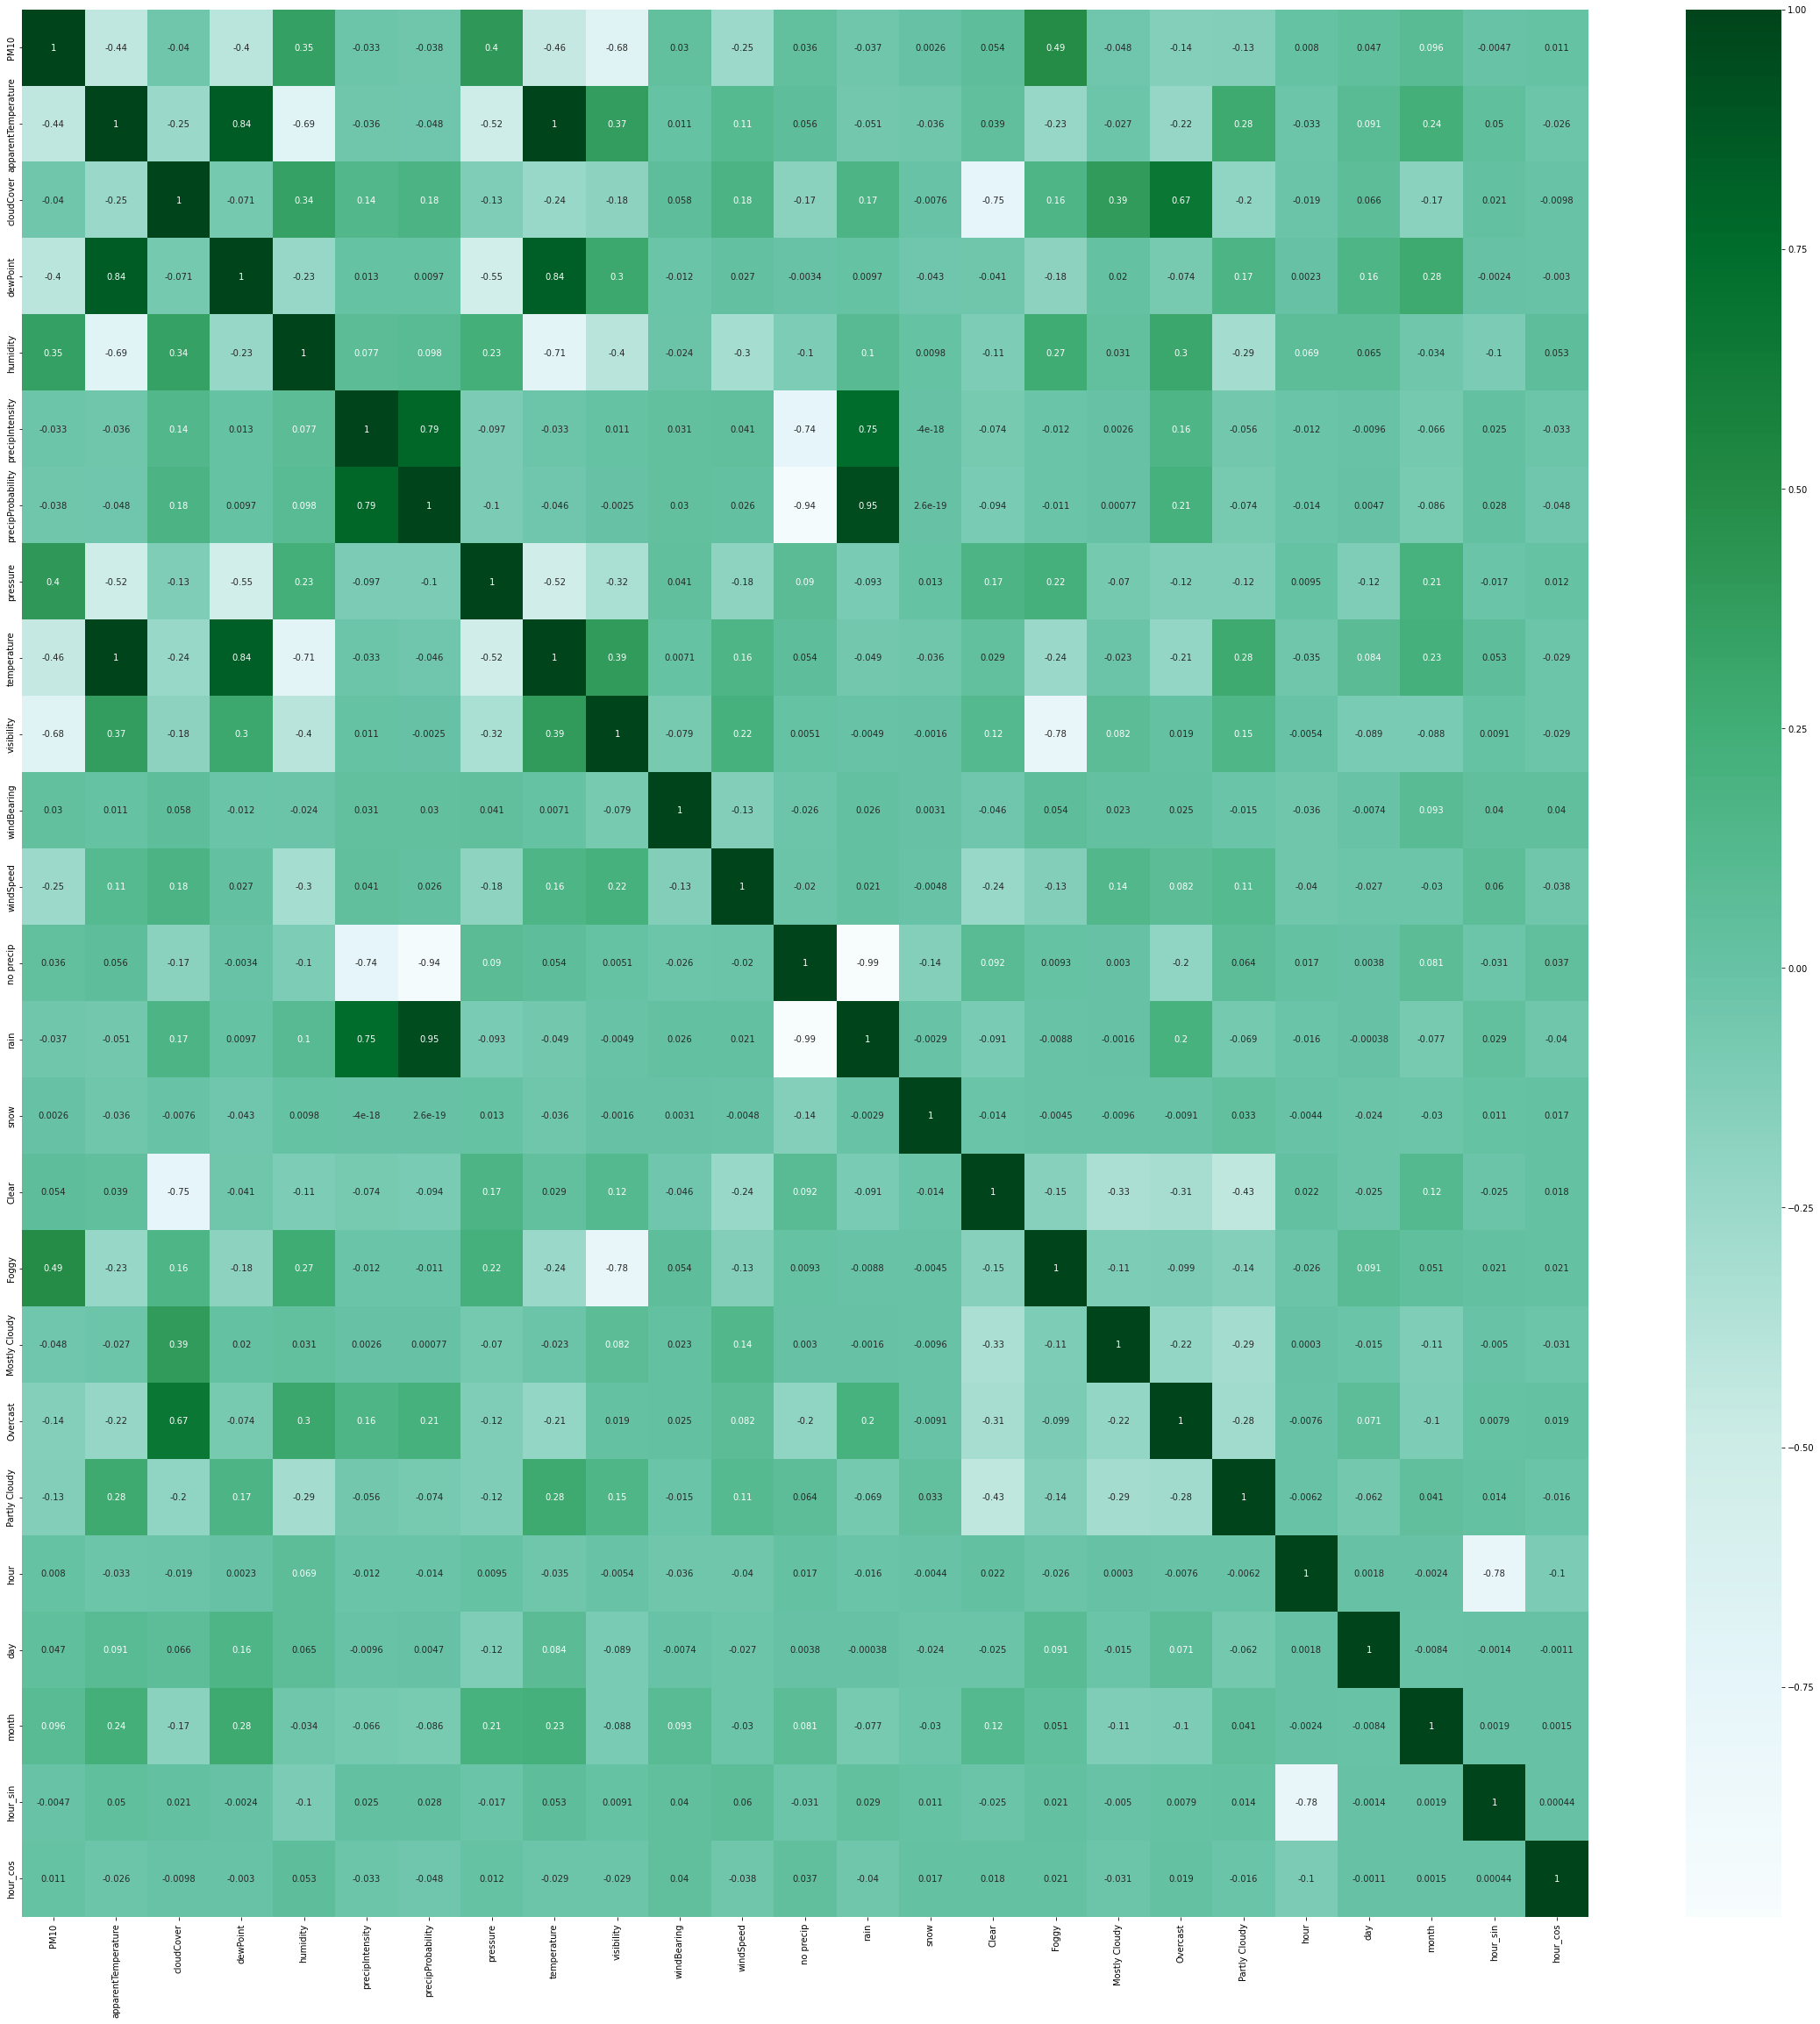

In [36]:
corrmat = df.corr()
top_corr_features = corrmat.index


plt.figure(figsize=(40,40))

g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='BuGn')

In [37]:
corrmat

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,Clear,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month,hour_sin,hour_cos
PM10,1.000000,-0.436157,-0.040081,-0.399637,0.350259,-3.348547e-02,-3.818220e-02,0.403260,-0.458540,-0.675735,...,0.053980,0.493524,-0.047515,-0.138412,-0.130380,0.007956,0.046790,0.096443,-0.004676,0.011384
apparentTemperature,-0.436157,1.000000,-0.247205,0.844816,-0.691776,-3.626811e-02,-4.838852e-02,-0.515912,0.996025,0.371526,...,0.039214,-0.231404,-0.026529,-0.224267,0.278701,-0.032915,0.090608,0.237142,0.050425,-0.026366
cloudCover,-0.040081,-0.247205,1.000000,-0.070903,0.339626,1.397492e-01,1.801075e-01,-0.126904,-0.237793,-0.179580,...,-0.747525,0.164163,0.392503,0.669702,-0.199221,-0.018879,0.066263,-0.167388,0.021073,-0.009808
dewPoint,-0.399637,0.844816,-0.070903,1.000000,-0.233289,1.274936e-02,9.670339e-03,-0.545750,0.835708,0.297259,...,-0.040975,-0.178543,0.020212,-0.074064,0.170524,0.002293,0.164200,0.278394,-0.002398,-0.002985
humidity,0.350259,-0.691776,0.339626,-0.233289,1.000000,7.673651e-02,9.828249e-02,0.232912,-0.713104,-0.396883,...,-0.108137,0.267974,0.031001,0.301127,-0.292122,0.069013,0.064903,-0.034064,-0.102825,0.052706
precipIntensity,-0.033485,-0.036268,0.139749,0.012749,0.076737,1.000000e+00,7.895527e-01,-0.097395,-0.032850,0.011397,...,-0.074087,-0.011767,0.002593,0.163156,-0.055780,-0.011542,-0.009642,-0.066365,0.025231,-0.033470
precipProbability,-0.038182,-0.048389,0.180107,0.009670,0.098282,7.895527e-01,1.000000e+00,-0.102878,-0.046387,-0.002536,...,-0.093834,-0.010518,0.000771,0.211210,-0.074358,-0.013951,0.004698,-0.085730,0.027717,-0.048003
pressure,0.403260,-0.515912,-0.126904,-0.545750,0.232912,-9.739453e-02,-1.028783e-01,1.000000,-0.523556,-0.324208,...,0.174150,0.223311,-0.069803,-0.121359,-0.121475,0.009494,-0.118990,0.205477,-0.016746,0.011530
temperature,-0.458540,0.996025,-0.237793,0.835708,-0.713104,-3.284995e-02,-4.638714e-02,-0.523556,1.000000,0.391837,...,0.028966,-0.244127,-0.023460,-0.214110,0.283844,-0.034933,0.083756,0.228416,0.052798,-0.029410
visibility,-0.675735,0.371526,-0.179580,0.297259,-0.396883,1.139718e-02,-2.535867e-03,-0.324208,0.391837,1.000000,...,0.121593,-0.783119,0.082276,0.019089,0.153232,-0.005433,-0.088892,-0.088251,0.009077,-0.028631


There are several features that bring high correlations between themselvs, giving the little information about the dataset, as follows: 0.996 (temperature with ApparentTemperature), with 0.99 (noPrecip with rain), 0.95 (precipProbability with rain), 0.94 (noPrecip with probability) etc. The highest correlation with the target variable (PM10) is having the feature 'visibility' (0.68), bringing the highest correlation between this feature with the target variable.

## 2.4 Split the data 

Set the random_state=1

In [38]:
#split the data, 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
X_train.shape

(5146, 24)

In [40]:
X_test.shape

(2206, 24)

## 3 Default Regressor

Create regressors with default parameters:
- Linear Regression
- LASSO regression (try if you want)
- Random Forest
- XGBoost (try if you want)
- SVR
- KNN
- Dummy regressor

Compare the MAE values in a table

In [85]:
#X_train, X_test, y_train, y_test -- fit, predict, metric
#model, model_name
global_metrics = list()
def models(X_train, X_test, y_train, y_test, model, model_name):
    local_metrics = list()
    model.fit(X_train, y_train)
    local_metrics.append(model_name)
    y_pred = model.predict(X_test)

    mae1 = mean_absolute_error(y_test, y_pred)
    local_metrics.append(mae1)
    print('- Mean absolute error: %.2f'%mae1)
    print('- Coefficient of determination (R2 score): %.2f'%r2_score(y_test, y_pred))
    global_metrics.append(local_metrics)
    
    #plot 
    sns.set(font_scale=1.5)
    plt.scatter(y_test, y_pred, color='black')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title("Ground Truth vs Predicted")
    plt.show()
    
    print('-----------------------------------------------------------')

In [86]:
global_metrics

[]

### Linear Regression

- Mean absolute error: 33.64
- Coefficient of determination (R2 score): 0.59


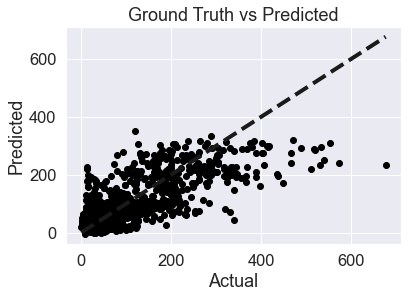

-----------------------------------------------------------


In [43]:
model = linear_model.LinearRegression()

models(X_train, X_test, y_train, y_test, model, 'Linear Regression')

### Lasso

- Mean absolute error: 33.31
- Coefficient of determination (R2 score): 0.58


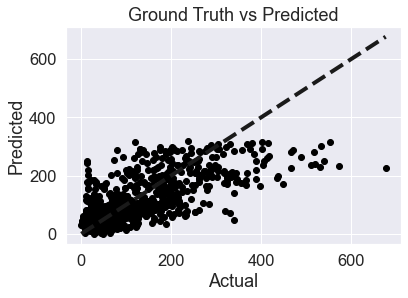

-----------------------------------------------------------


In [44]:
model = linear_model.Lasso()

models(X_train, X_test, y_train, y_test, model, 'LASSO')

### Random Forest

- Mean absolute error: 17.74
- Coefficient of determination (R2 score): 0.84


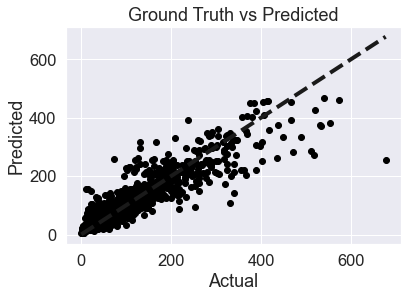

-----------------------------------------------------------


In [45]:
model = RandomForestRegressor(random_state=1)

models(X_train, X_test, y_train, y_test, model, 'RF')

### SVM

- Mean absolute error: 44.66
- Coefficient of determination (R2 score): -0.10


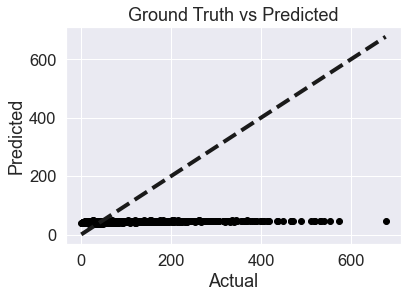

-----------------------------------------------------------


In [46]:
model = SVR()
models(X_train, X_test, y_train, y_test, model, 'SVR')

### KNN

- Mean absolute error: 30.59
- Coefficient of determination (R2 score): 0.54


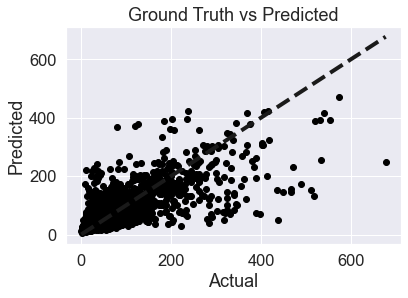

-----------------------------------------------------------


In [47]:
model = KNeighborsRegressor()
models(X_train, X_test, y_train, y_test, model, 'KNN')

### Dummy

- Mean absolute error: 54.80
- Coefficient of determination (R2 score): -0.00


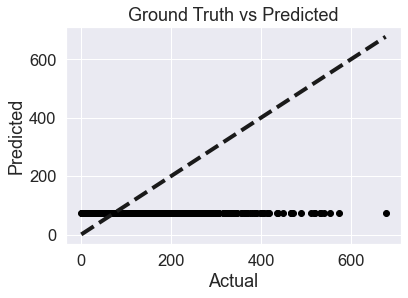

-----------------------------------------------------------


In [48]:
dummy_reg = DummyRegressor(strategy='mean')
models(X_train, X_test, y_train, y_test, dummy_reg, 'Dummy')

In [87]:
model_list = [linear_model.LinearRegression(),
              linear_model.Lasso(),
              RandomForestRegressor(random_state=1),
              SVR(),
              KNeighborsRegressor(),
              DummyRegressor(strategy='mean')]

In [88]:
model_list

[LinearRegression(),
 Lasso(),
 RandomForestRegressor(random_state=1),
 SVR(),
 KNeighborsRegressor(),
 DummyRegressor()]

LinearRegression()
- Mean absolute error: 33.64
- Coefficient of determination (R2 score): 0.59


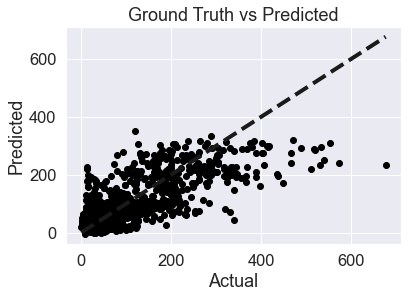

-----------------------------------------------------------
Lasso()
- Mean absolute error: 33.31
- Coefficient of determination (R2 score): 0.58


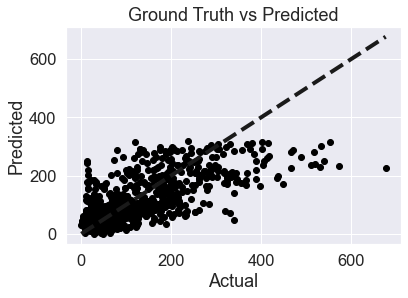

-----------------------------------------------------------
RandomForestRegressor(random_state=1)
- Mean absolute error: 17.74
- Coefficient of determination (R2 score): 0.84


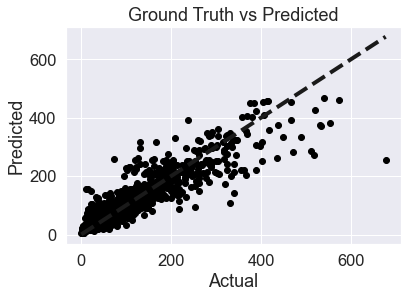

-----------------------------------------------------------
SVR()
- Mean absolute error: 44.66
- Coefficient of determination (R2 score): -0.10


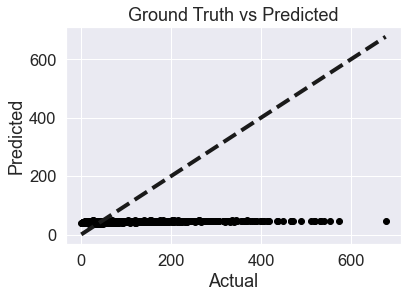

-----------------------------------------------------------
KNeighborsRegressor()
- Mean absolute error: 30.59
- Coefficient of determination (R2 score): 0.54


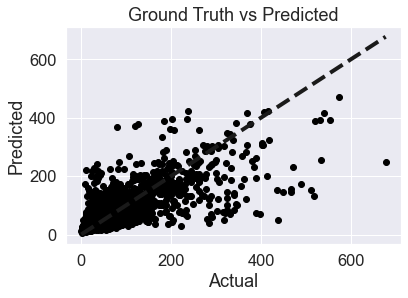

-----------------------------------------------------------
DummyRegressor()
- Mean absolute error: 54.80
- Coefficient of determination (R2 score): -0.00


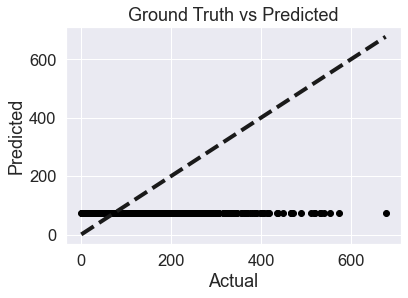

-----------------------------------------------------------


In [89]:
for model in model_list:
    print(model)
    models(X_train, X_test, y_train, y_test, model, model)

In [90]:
global_metrics

[[LinearRegression(), 33.64493887615019],
 [Lasso(), 33.31324862912254],
 [RandomForestRegressor(random_state=1), 17.740454515323748],
 [SVR(), 44.65536355958734],
 [KNeighborsRegressor(), 30.593195733583862],
 [DummyRegressor(), 54.80440252399545]]

In [58]:
compare = pd.DataFrame(global_metrics, columns=['model_name', 'mae'])

In [59]:
compare.sort_values(by = ['mae'])

,model_name,mae
2,"(DecisionTreeRegressor(max_features=1.0, rando...",17.740455
4,KNeighborsRegressor(),30.593196
1,Lasso(),33.313249
0,LinearRegression(),33.644939
3,SVR(),44.655364
5,DummyRegressor(),54.804403


In [60]:
compare

,model_name,mae
0,LinearRegression(),33.644939
1,Lasso(),33.313249
2,"(DecisionTreeRegressor(max_features=1.0, rando...",17.740455
3,SVR(),44.655364
4,KNeighborsRegressor(),30.593196
5,DummyRegressor(),54.804403


## 3. Feature Selection

Use SelectKBest feature selection technique.
Reduce the number of features to 15

In [61]:
from sklearn.feature_selection import SelectKBest, f_regression
#chosing 15 best features according to the correlation matrix

test = SelectKBest(score_func=f_regression, k=15)
fit = test.fit(df, y)

np.set_printoptions(precision = 3) #decimal figures to be more readable
print(fit.scores_)

[-4.138e+18  1.727e+03  1.183e+01  1.397e+03  1.028e+03  8.251e+00
  1.073e+01  1.427e+03  1.957e+03  6.176e+03  6.407e+00  4.967e+02
  9.550e+00  9.941e+00  5.071e-02  2.148e+01  2.367e+03  1.663e+01
  1.436e+02  1.271e+02  4.653e-01  1.613e+01  6.901e+01  1.607e-01
  9.526e-01]


In [62]:
cols = test.get_support(indices=True)
X_test_15 = X_test.iloc[:, cols] #getting the test data with the choosen 15 columns
X_train_15 = X_train.iloc[:, cols] #getting the train data with the choosen 15 columns

print(cols)

[ 1  2  3  4  7  8  9 11 15 16 17 18 19 21 22]


In [63]:
X_train_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5146 entries, 2584 to 5157
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cloudCover       5146 non-null   float64
 1   dewPoint         5146 non-null   float64
 2   humidity         5146 non-null   float64
 3   precipIntensity  5146 non-null   float64
 4   temperature      5146 non-null   float64
 5   visibility       5146 non-null   float64
 6   windBearing      5146 non-null   float64
 7   no precip        5146 non-null   float64
 8   Foggy            5146 non-null   float64
 9   Mostly Cloudy    5146 non-null   float64
 10  Overcast         5146 non-null   float64
 11  Partly Cloudy    5146 non-null   float64
 12  hour             5146 non-null   int64  
 13  month            5146 non-null   int64  
 14  hour_sin         5146 non-null   float64
dtypes: float64(13), int64(2)
memory usage: 643.2 KB


Create new regressors with default parameters with the selected 15 features:
- Linear Regression
- LASSO regression
- Random Forest
- XGBoost (try if you want)
- SVR
- KNN
- Dummy regressor

Compare the MAE values in a table

In [64]:
global_metrics = list() #cleaning the global metrics list again, in order to use it again for the dataset with 15 features
global_metrics

[]

In [65]:
X_train_15

,cloudCover,dewPoint,humidity,precipIntensity,temperature,visibility,windBearing,no precip,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,month,hour_sin
2584,0.19,45.28,0.31,0.0,78.89,6.216,60.000000,1.0,0.0,0.0,0.0,1.0,16,4,-8.660254e-01
6626,1.00,34.07,0.71,0.0,42.84,6.216,281.000000,1.0,0.0,0.0,1.0,0.0,2,10,5.000000e-01
3732,0.44,41.00,0.29,0.0,74.99,6.216,350.000000,1.0,0.0,0.0,0.0,1.0,12,6,1.224647e-16
1893,1.00,41.00,0.94,0.0,42.60,4.346,156.971795,1.0,0.0,0.0,1.0,0.0,21,3,-7.071068e-01
2053,0.00,32.18,0.86,0.0,35.96,6.216,50.000000,1.0,0.0,0.0,0.0,0.0,13,3,-2.588190e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.00,26.99,0.73,0.0,34.78,6.216,30.000000,1.0,0.0,0.0,1.0,0.0,17,2,-9.659258e-01
5192,0.00,53.81,0.59,0.0,68.69,6.216,156.971795,1.0,0.0,0.0,0.0,0.0,8,8,8.660254e-01
3980,0.13,57.20,0.40,0.0,84.01,6.216,281.000000,1.0,0.0,0.0,0.0,1.0,20,6,-8.660254e-01
235,0.44,29.43,0.82,0.0,34.38,2.175,210.000000,1.0,0.0,0.0,0.0,1.0,19,1,-9.659258e-01


In [66]:
X_test_15

,cloudCover,dewPoint,humidity,precipIntensity,temperature,visibility,windBearing,no precip,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,month,hour_sin
2164,0.00,21.21,0.52,0.0,37.19,6.216,161.000000,1.0,0.0,0.0,0.0,0.0,4,4,0.866025
1233,0.13,31.60,0.40,0.0,55.54,6.216,150.000000,1.0,0.0,0.0,0.0,1.0,9,2,0.707107
2495,0.19,41.19,0.64,0.0,53.02,6.216,30.000000,1.0,0.0,0.0,0.0,1.0,23,4,-0.258819
5529,0.00,59.85,0.70,0.0,69.89,6.216,156.971795,1.0,0.0,0.0,0.0,0.0,9,8,0.707107
2702,0.00,49.29,0.55,0.0,65.72,6.216,226.000000,1.0,0.0,0.0,0.0,0.0,14,4,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.00,23.02,0.81,0.0,28.21,6.216,156.971795,1.0,0.0,0.0,0.0,0.0,1,2,0.258819
3611,0.75,57.20,0.65,0.0,69.61,6.216,20.000000,1.0,0.0,1.0,0.0,0.0,11,5,0.258819
850,0.19,42.25,0.75,0.0,49.75,6.216,156.971795,1.0,0.0,0.0,0.0,1.0,10,2,0.500000
6431,0.00,31.82,1.00,0.0,31.82,1.555,156.971795,1.0,1.0,0.0,0.0,0.0,23,9,-0.258819


LinearRegression()
- Mean absolute error: 33.98
- Coefficient of determination (R2 score): 0.58


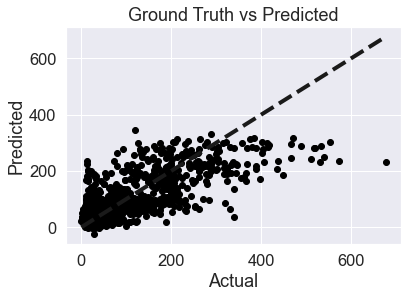

-----------------------------------------------------------
Lasso()
- Mean absolute error: 33.78
- Coefficient of determination (R2 score): 0.57


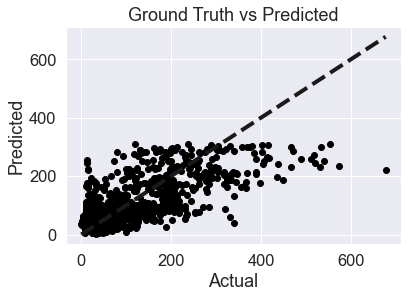

-----------------------------------------------------------
RandomForestRegressor(random_state=1)
- Mean absolute error: 22.15
- Coefficient of determination (R2 score): 0.76


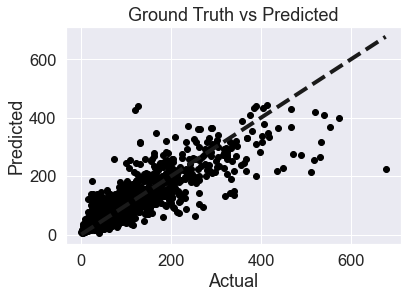

-----------------------------------------------------------
SVR()
- Mean absolute error: 41.43
- Coefficient of determination (R2 score): 0.06


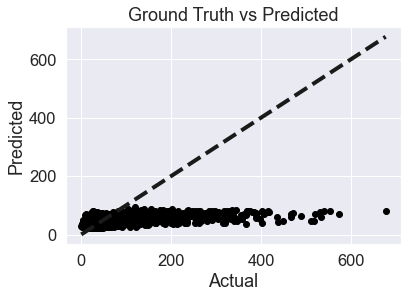

-----------------------------------------------------------
KNeighborsRegressor()
- Mean absolute error: 33.11
- Coefficient of determination (R2 score): 0.50


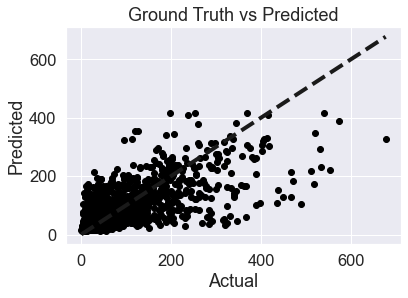

-----------------------------------------------------------
DummyRegressor()
- Mean absolute error: 54.80
- Coefficient of determination (R2 score): -0.00


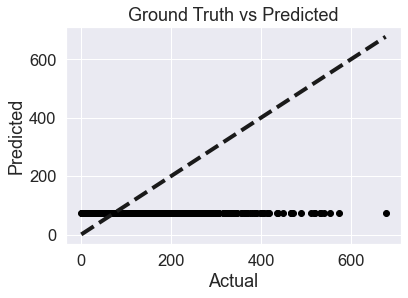

-----------------------------------------------------------


In [67]:
for model in model_list:  
    print(model)
    models(X_train_15, X_test_15, y_train, y_test, model, model)

Compare the the two tables (all features vs top15 features).
Discuss the results

In [68]:
global_metrics

[[LinearRegression(), 33.98172128725111],
 [Lasso(), 33.77988683641803],
 [RandomForestRegressor(random_state=1), 22.15326007934532],
 [SVR(), 41.43367884813451],
 [KNeighborsRegressor(), 33.11137137148658],
 [DummyRegressor(), 54.80440252399545]]

In [69]:
compare1 = pd.DataFrame(global_metrics, columns=['model_name_15', 'mae_15'])
compare1

,model_name_15,mae_15
0,LinearRegression(),33.981721
1,Lasso(),33.779887
2,"(DecisionTreeRegressor(max_features=1.0, rando...",22.153260
3,SVR(),41.433679
4,KNeighborsRegressor(),33.111371
5,DummyRegressor(),54.804403


In [70]:
compare_off = pd.concat([compare, compare1], axis = 1)
compare_off.sort_values(by = ['mae_15'])

,model_name,mae,model_name_15,mae_15
2,"(DecisionTreeRegressor(max_features=1.0, rando...",17.740455,"(DecisionTreeRegressor(max_features=1.0, rando...",22.153260
4,KNeighborsRegressor(),30.593196,KNeighborsRegressor(),33.111371
1,Lasso(),33.313249,Lasso(),33.779887
0,LinearRegression(),33.644939,LinearRegression(),33.981721
3,SVR(),44.655364,SVR(),41.433679
5,DummyRegressor(),54.804403,DummyRegressor(),54.804403


Compared to the dataset where all features are taken, taking only the 15 most important (most correlated to the target variable according to the correlation matrix), mean absolute values for the same regression models are very similar, with exception to Random forest, where with 15 features is a bit worsened. SVR though, gave even better mae result, taking only 15 features.

## 4. Hyperparameter Optimization

Use the dataset with the selected 15 features.

### 4.1 Random Search
Use Random Search CV to optimize the parameters for:
- LASSO regression
- Random Forest
- SVR

Use appropriate  n_iter, so that it ends in a reasonable time
 <br>Use CV = 3

Use Cross Validation for optimization, and the test set for final evaluation
<br> <b>DO NOT OPTIMIZE ON THE TEST SET </b>

Show the 2 comparison tables: 
- on the CV  
- on the test set

In [71]:
%%time
kf = KFold(n_splits=3, shuffle=True)

scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']


#Create the space of hyperparameter values

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]

# Number of features to consider at every split
max_features = ['auto', 10, 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
#alpha_ = 1    #[np.linspace(start = 1, stop = 5, num = 1)]=> mi dava greska
max_iter_ = [1000,1100,1200]


random_search1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_search2 = {
               'max_iter':max_iter_}



rf = RandomForestRegressor()
lasso = linear_model.Lasso()
svr = SVR()



#create the Random Forest model and train it
RF = RandomizedSearchCV(estimator = rf, 
                           param_distributions = random_search1, 
                           n_iter = 10, 
                           cv = kf, verbose= 5, random_state= 1, 
                           n_jobs = -1)
RF.fit(X_train, y_train)

#create the  Lasso model and train it
LASSO = RandomizedSearchCV(estimator = lasso, 
                           param_distributions = random_search2, 
                           n_iter = 10, 
                           cv = kf, verbose= 5, random_state= 1, 
                           n_jobs = -1)
LASSO.fit(X_train, y_train)

#create the  SVR model and train it
kernel_ = ['linear', 'rbf']
C_ = [10,100]
gamma_ = ['scale', 'auto']
epsilon_ = [0.1, 0.2]

random_search3 = {'kernel': kernel_,
                  'C': C_, 
                  'gamma' : gamma_,
                  'epsilon' : epsilon_}


SVR_ = RandomizedSearchCV(estimator = svr, 
                          param_distributions = random_search3, 
                          n_iter = 10, 
                           cv = kf, verbose= 5, random_state= 1, 
                           n_jobs = -1)
SVR_.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Wall time: 7min 57s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [10, 100], 'epsilon': [0.1, 0.2],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=1, verbose=5)

NOTE: with 15 features it lasted 56 minutes, while with all features, just 7 minutes, strange :(

In [238]:
alpha_ = [np.linspace(start = 1, stop = 5, num = 1)]
alpha_

[array([1.])]

In [97]:
print(RF.best_estimator_)
print(LASSO.best_estimator_)
print(SVR_.best_estimator_)

RandomForestRegressor(max_depth=100, max_features='auto', n_estimators=504)
Lasso(max_iter=1200)
SVR(C=10, epsilon=0.2, gamma='auto', kernel='linear')


In [98]:
global_metrics = list()

- Mean absolute error: 17.50
- Coefficient of determination (R2 score): 0.84


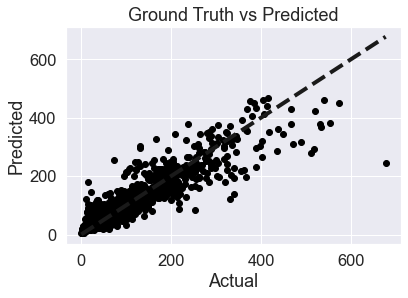

-----------------------------------------------------------


In [99]:
model = RF.best_estimator_
models(X_train,X_test,y_train,y_test,model,'Random Forest')

- Mean absolute error: 33.31
- Coefficient of determination (R2 score): 0.58


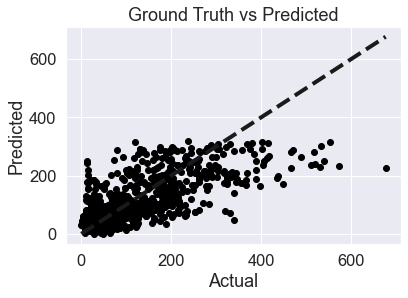

-----------------------------------------------------------


In [100]:
model = LASSO.best_estimator_
models(X_train,X_test,y_train,y_test,model,'Lasso')

- Mean absolute error: 32.44
- Coefficient of determination (R2 score): 0.57


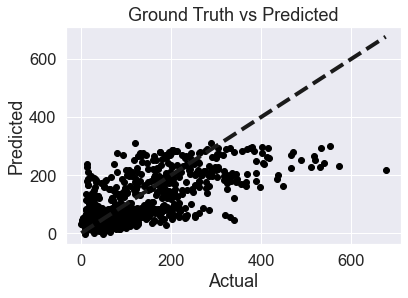

-----------------------------------------------------------
Wall time: 1min 19s


In [101]:
%%time
model = SVR_.best_estimator_
models(X_train,X_test,y_train,y_test,model,'SVM')

In [102]:
comparation_2 = pd.DataFrame(global_metrics,columns=['model_name','mae_features_tuning'])
comparation_2

,model_name,mae_features_tuning
0,Random Forest,17.501099
1,Lasso,33.313147
2,SVM,32.440502


## 5. SUMMARY

Visualize the errors (actual vs predicted) for the best 3 regressor

In [95]:
#already done

Summarize the results (MAE) for the following models in a single table:
- Random Forest - default parameters
- Random Forest - selected 15 features
- Random Forest - selected 15 features - optimized hyperparameters
- LASSO - default parameters
- LASSO - selected 15 features
- LASSO - selected 15 features - optimized hyperparameters
- SVR - default parameters
- SVR - selected 15 features
- SVR - selected 15 features - optimized hyperparameters
- Dummy regressor

In [109]:
table = pd.concat([compare, comparation_2], axis = 1)
table.sort_values(by = ['mae'])

,model_name,mae,model_name,mae_features_tuning
2,"(DecisionTreeRegressor(max_features=1.0, rando...",17.740455,SVM,32.440502
4,KNeighborsRegressor(),30.593196,NaN,NaN
1,Lasso(),33.313249,Lasso,33.313147
0,LinearRegression(),33.644939,Random Forest,17.501099
3,SVR(),44.655364,NaN,NaN
5,DummyRegressor(),54.804403,NaN,NaN


Compared to the results for the whole datasets (including all columns), RF algorithms' mae has improved from 17.74 to 17.50. Not high difference, but believe it worth. Sorry, couldn't find a better way to compare both, already tired of all above :)